In [28]:
import json
import os

output_dir = "output/report_output/2_agents/"
# get the path of each folder in the output folder
folders = os.listdir(output_dir)
# get the json files in each folder
data = {}
for folder in folders:
    # list each file that ends with .json
    if "interm" in folder:
        continue
    try:
        files = os.listdir(output_dir + folder)
    except Exception as e:
        print(e)
    files = [file for file in files if file.endswith('.json')]
    print(files)
    try:
        with open(output_dir + folder + '/' + 'config.json') as f:
            json_data = json.load(f)
            try:
                print(json_data['filename'], folder)
            except:
                continue
                # remove the folder from the data
    except:
        continue
    
    data[folder] = {}
    for file in files:
        with open(output_dir + folder + '/' + file) as f:
            json_data = json.load(f)
            data[folder][file] = json_data




['config.json', 'result.json', 'history.json']
envs/2-agents/hard/2-agents-4vsmistral.json A_gpt-4_D_Mistral_hard20231001_203321
['config.json', 'result.json', 'history.json']
envs/2-agents/simple/2-agents-3vsmistral.json A_gpt-3.5-turbo_D_Mistral_20231001_200544
['config.json', 'result.json', 'history.json']
envs/2-agents/simple/2-agents-3vsmistral.json A_gpt-3.5-turbo_D_Mistral_20231001_200414
['config.json', 'result.json', 'history.json']
envs/2-agents/simple/2-agents-3vsmistral.json A_gpt-3.5-turbo_D_Mistral_20231001_200212
['config.json']
envs/2-agents/hard/2-agents-mistralvsmistral.json A_Mistral_D_Mistral_hard20231001_202822
['config.json', 'result.json', 'history.json']
envs/2-agents/hard/2-agents-4vsmistral.json A_gpt-4_D_Mistral_hard20231001_203635
['config.json', 'result.json', 'history.json']
envs/2-agents/simple/2-agents-3vsmistral.json A_gpt-3.5-turbo_D_Mistral_20231001_200633
['config.json', 'result.json', 'history.json']
envs/2-agents/hard/2-agents-4vsmistral.json A_gpt

In [29]:
print(len(data))
plot_data = {}

for run in data:
    filename = str(data[run]['config.json']['filename'])
    players = data[run]['config.json']['players']
    if filename not in plot_data:
        plot_data[filename] = []
    try:
        plot_data[filename].append(str(data[run]['result.json']['solved']))
    except:
        pass
# get the statistics for each backend vs. backend
print(plot_data)

23
{'envs/2-agents/hard/2-agents-4vsmistral.json': ['False', 'True', 'True', 'False', 'True', 'False', 'True', 'True', 'True', 'False'], 'envs/2-agents/simple/2-agents-3vsmistral.json': ['False', 'True', 'False', 'True', 'True', 'False', 'False', 'False', 'False', 'False'], 'envs/2-agents/hard/2-agents-mistralvsmistral.json': []}


ZeroDivisionError: division by zero

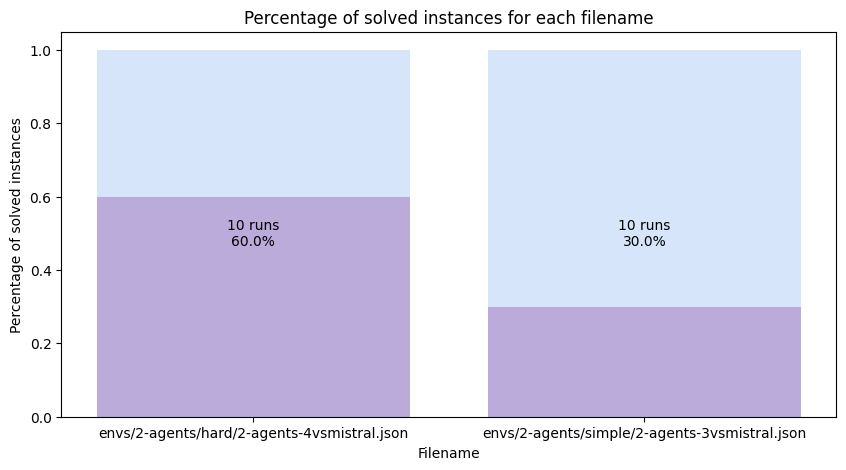

In [30]:
# plot the data for each filename
import matplotlib.pyplot as plt

# plot the percentage of true and false for each filename
plt.figure(figsize=(10, 5))
plt.title('Percentage of solved instances for each filename')
plt.xlabel('Filename')
plt.ylabel('Percentage of solved instances')
for filename in plot_data:
    true = plot_data[filename].count('True')
    false = plot_data[filename].count('False')
    plt.bar(filename, true / (true + false), color='#BAABDA')
    plt.bar(filename, false / (true + false), bottom=true / (true + false), color='#D6E5FA')
    # add total number of instances
    true_percentage = round(true / (true + false) * 100, 2)
    plt.text(filename, 0.5, str(true + false) +' runs\n'+str(true_percentage)+'%', ha='center', va='center')
# rotate the xticks
plt.xticks(rotation=70)
plt.legend(['True', 'False'])
plt.show()